<h1>Ebene Geometrie</h1>

In [1]:
A=[1,1]
B=[5,3]
C=[-1,5]

Zeichne Dreieck, Schwerlinien, Schwerpunkt

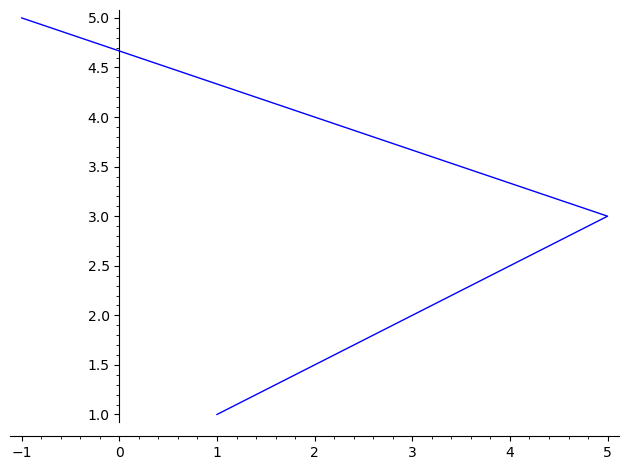

In [2]:
g=line([A,B,C])
g

Linie zurück zu A fehlt noch

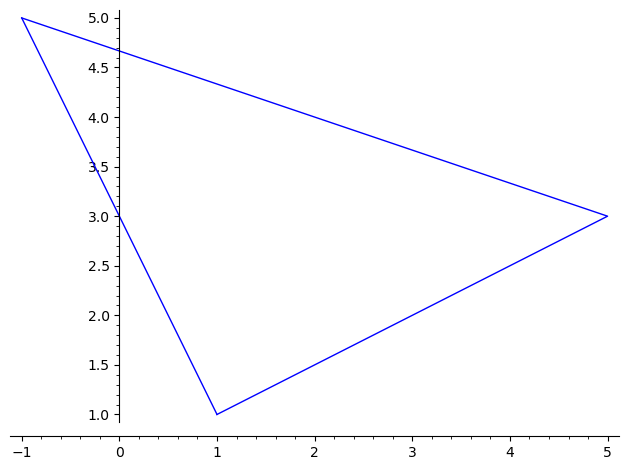

In [3]:
g+=line([A,C])
g

alternativ:

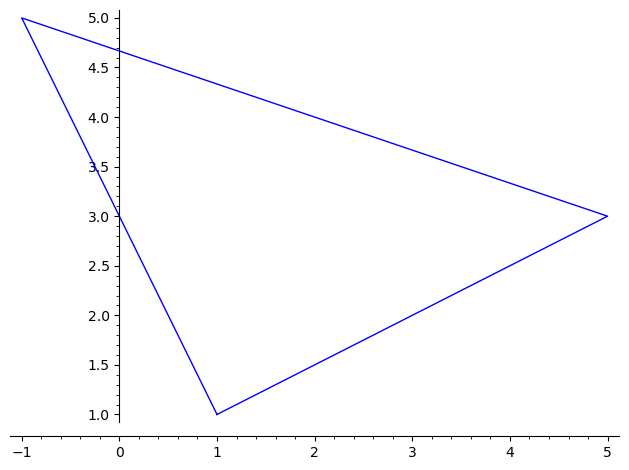

In [4]:
g=line([A,B,C,A])
g

In [5]:
(A+B)/2   # Seitenmittelpunkt

TypeError: unsupported operand parent(s) for /: '<class 'list'>' and 'Integer Ring'

Der letzte Befehl hat nicht funktioniert, weil A und B Listen und keine Vektoren sind. Z.B. liefert Addition von Listen nicht das, was wir wollen:

In [6]:
A+B

[1, 1, 5, 3]

In [7]:
A=vector(A)
B=vector(B)
C=vector(C)
A,B,C

((1, 1), (5, 3), (-1, 5))

In [8]:
parent(A)

Ambient free module of rank 2 over the principal ideal domain Integer Ring

"free Module": so etwas wie ein Vektorraum, nur über einem Ring, in dem man nicht unbedingt durch alle Elemente ungleich 0 dividieren kann (hier: ZZ). 

In [9]:
(A+B)/2  # Mittelpunkt

(3, 2)

In [10]:
parent(_)

Vector space of dimension 2 over Rational Field

Durch die Division wurde automatisch von ZZ^2 in den Vektorraum QQ^2 gewechselt.

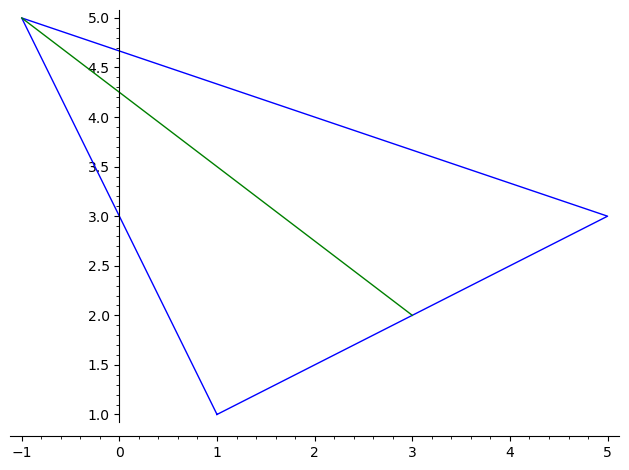

In [11]:
g+=line([(A+B)/2,C],color='green')
g

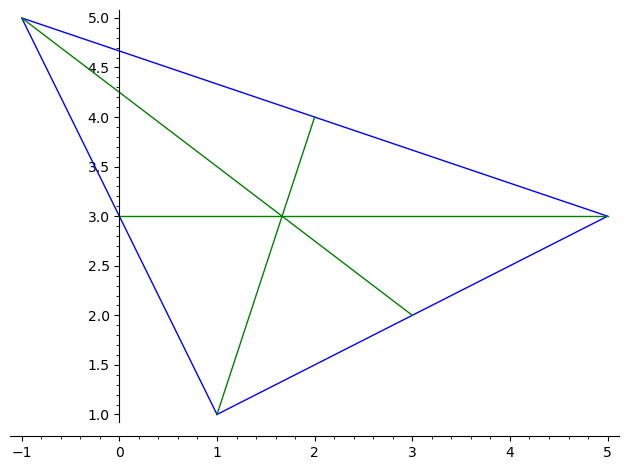

In [12]:
g+=line([(B+C)/2,A],color='green')
g+=line([(A+C)/2,B],color='green')
g

Nun wollen wir noch den Schwerpunkt einzeichnen. Dazu müssen wir seine Koordinaten berechnen. Wir tun das, indem wir für den Durchschnitt zweier Schwerlinien ein Gleichungssystem aufstellen und lösen.

In [13]:
var('s,t')

(s, t)

In [14]:
sA = A + s*((B+C)/2-A)    # Schwerlinie von Ecke A zum Mittelpunkt der Seite BC
sA

(s + 1, 3*s + 1)

In [15]:
sB = B +t*((A+C)/2-B)
sB

(-5*t + 5, 3)

In [16]:
solve(sA==sB,[s,t])

TypeError: The first argument must be a symbolic expression or a list of symbolic expressions.

Hat nicht funktioniert, da sA==sB kein symbolischer Ausdruck ist: es wird hier automatisch zu False ausgewertet, da die beiden Geraden ungleich sind.

In [17]:
sA==sB

False

In [18]:
sA-sB

(s + 5*t - 4, 3*s - 2)

In [19]:
solve(sA-sB,[s,t])

TypeError: The first argument must be a symbolic expression or a list of symbolic expressions.

Klappt immer noch nicht, da sA-sB ein Vektor aus symbolischen Ausdrücken ist, und keine Liste.

In [20]:
list(sA-sB)

[s + 5*t - 4, 3*s - 2]

In [21]:
st=solve(list(sA-sB),[s,t])
st

[[s == (2/3), t == (2/3)]]

In [22]:
st[0]

[s == (2/3), t == (2/3)]

In [23]:
S=sA.subs(st[0])

In [24]:
S

(5/3, 3)

In [25]:
sB.subs(st[0])

(5/3, 3)

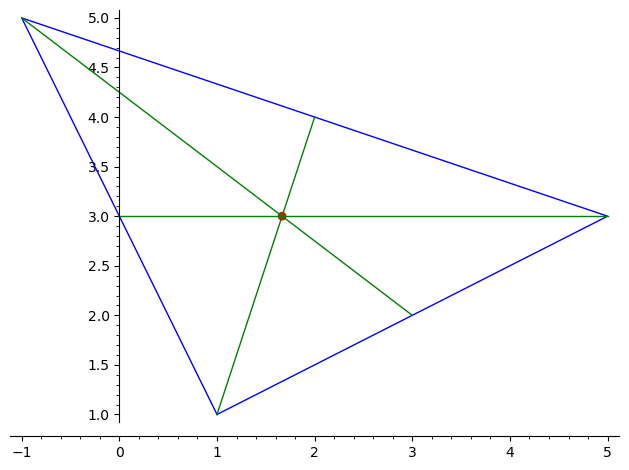

In [26]:
g+=point(S,color='red',pointsize=40)
g

<h1>n-Eck</h1> 

Wir wollen ein regelmäßiges n-Eck zeichnen.

In [27]:
def ngon(n):
    return [[cos(2*pi*k/n),sin(2*pi*k/n)] for k in [0..n]]

In [28]:
ngon(12)

[[1, 0],
 [1/2*sqrt(3), 1/2],
 [1/2, 1/2*sqrt(3)],
 [0, 1],
 [-1/2, 1/2*sqrt(3)],
 [-1/2*sqrt(3), 1/2],
 [-1, 0],
 [-1/2*sqrt(3), -1/2],
 [-1/2, -1/2*sqrt(3)],
 [0, -1],
 [1/2, -1/2*sqrt(3)],
 [1/2*sqrt(3), -1/2],
 [1, 0]]

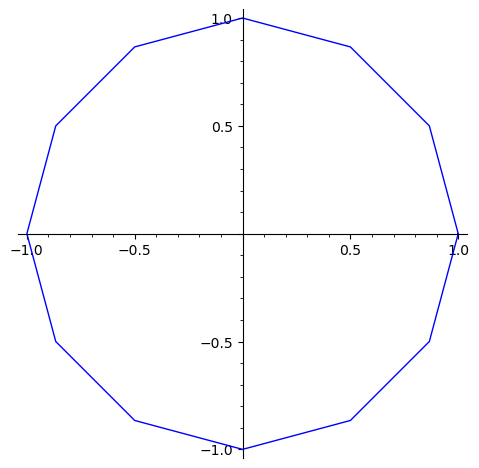

In [29]:
g=line(ngon(12),aspect_ratio=1)
g

Füge farbige Linien vom Ursprung zu den Eckpunkten hinzu:

In [30]:
pkte=ngon(12)
for k in range(12):
    g+=line([[0,0],pkte[k]],color=hue(k/12))

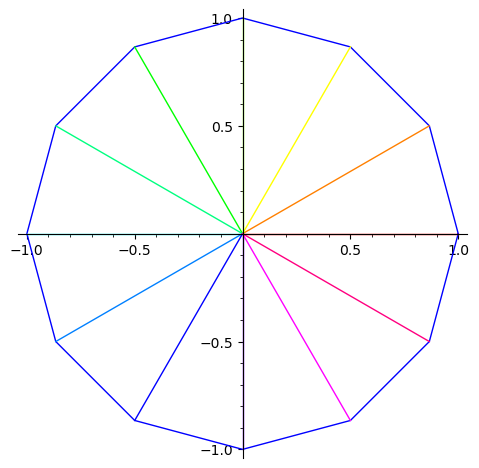

In [31]:
g

Die hier verwendete Funktion hue(h) parameterisiert alle Farbtöne durch Zahlen h von 0 bis 1. 

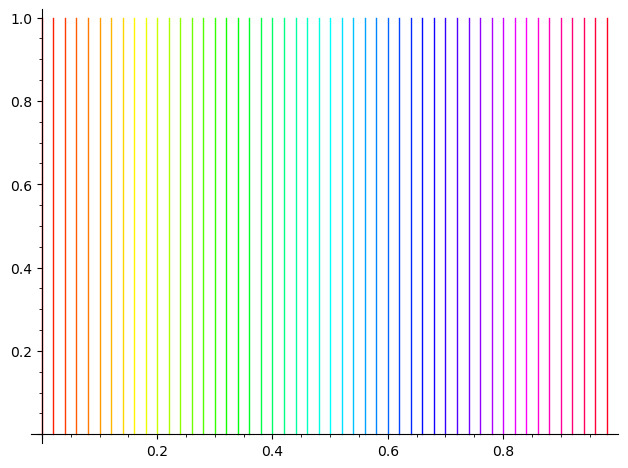

In [32]:
n=50
col=Graphics()

for k in range(n):
    col += line([[k/n,0],[k/n,1]],color=hue(k/n))
col

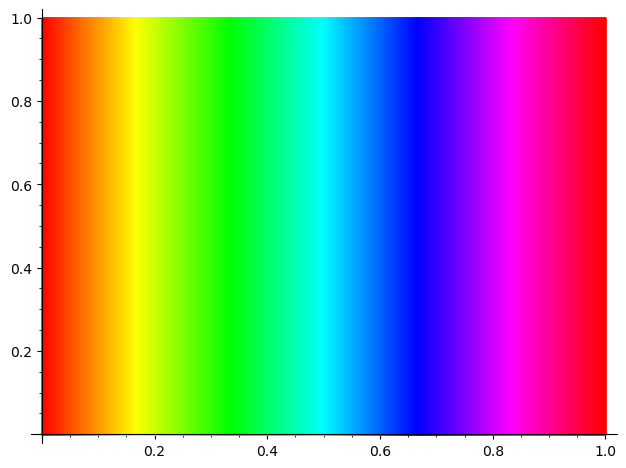

In [33]:
n=5000
col=Graphics()

for k in range(n):
    col += line([[k/n,0],[k/n,1]],color=hue(k/n))
col

hue(): kann noch zwei weitere Argumente übernehmen, beide zwischen 0 und 1 und mit Standardwert 1: Sättigung und Helligkeit der Farbe.

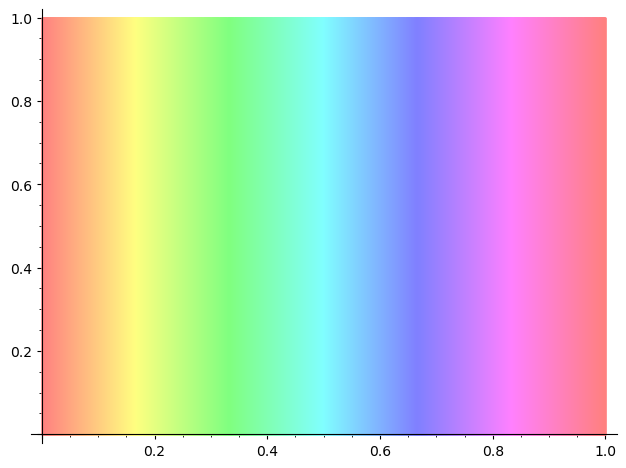

In [34]:
n=5000
col=Graphics()

for k in range(n):
    col += line([[k/n,0],[k/n,1]],color=hue(k/n,0.5,1))
col

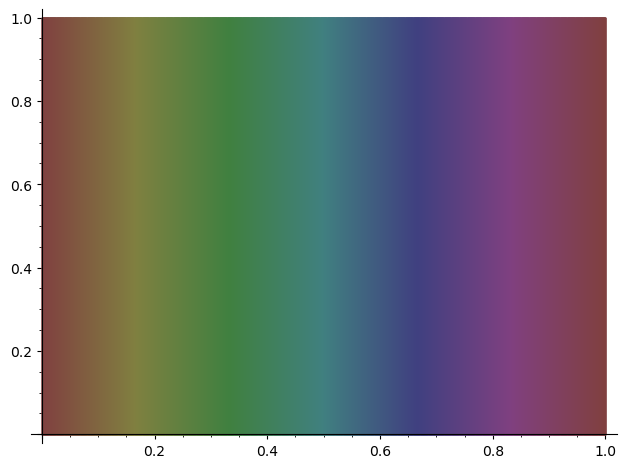

In [35]:
n=5000
col=Graphics()

for k in range(n):
    col += line([[k/n,0],[k/n,1]],color=hue(k/n,0.5,0.5))
col

<h1>Lineare Algebra</h1>

Matrizen

In [36]:
A=matrix([[1,2,3],[4,5,6]])
A

[1 2 3]
[4 5 6]

In [37]:
show(A)

[1 2 3]
[4 5 6]

In [38]:
parent(A)

Full MatrixSpace of 2 by 3 dense matrices over Integer Ring

In [39]:
A[1,1]

5

Achtung: Indizes starten bei 0! 

In [40]:
B=matrix(3,2,[1,2,3,4,5,6])
B

[1 2]
[3 4]
[5 6]

In [41]:
A*B

[22 28]
[49 64]

In [42]:
B*A

[ 9 12 15]
[19 26 33]
[29 40 51]

Man kann auch eine Funktion angeben, mittels der die Einträge aus ihren Zeilen- und Spaltenindizes berechnet werden.

Hier: die (10 x 10)-Hilbertmatrix

In [43]:
n=10
H=matrix(n,n,lambda i,j: 1/(i+j+1))
H

[   1  1/2  1/3  1/4  1/5  1/6  1/7  1/8  1/9 1/10]
[ 1/2  1/3  1/4  1/5  1/6  1/7  1/8  1/9 1/10 1/11]
[ 1/3  1/4  1/5  1/6  1/7  1/8  1/9 1/10 1/11 1/12]
[ 1/4  1/5  1/6  1/7  1/8  1/9 1/10 1/11 1/12 1/13]
[ 1/5  1/6  1/7  1/8  1/9 1/10 1/11 1/12 1/13 1/14]
[ 1/6  1/7  1/8  1/9 1/10 1/11 1/12 1/13 1/14 1/15]
[ 1/7  1/8  1/9 1/10 1/11 1/12 1/13 1/14 1/15 1/16]
[ 1/8  1/9 1/10 1/11 1/12 1/13 1/14 1/15 1/16 1/17]
[ 1/9 1/10 1/11 1/12 1/13 1/14 1/15 1/16 1/17 1/18]
[1/10 1/11 1/12 1/13 1/14 1/15 1/16 1/17 1/18 1/19]

Dasselbe mittels Listen: die innere list comprehension erzeugt die (i+1)-te Zeile, die äußere somit eine Liste aller Zeilen der Matrix.

In [44]:
H=matrix([[1/(i+j+1) for j in range(n)] for i in range(n)])
H

[   1  1/2  1/3  1/4  1/5  1/6  1/7  1/8  1/9 1/10]
[ 1/2  1/3  1/4  1/5  1/6  1/7  1/8  1/9 1/10 1/11]
[ 1/3  1/4  1/5  1/6  1/7  1/8  1/9 1/10 1/11 1/12]
[ 1/4  1/5  1/6  1/7  1/8  1/9 1/10 1/11 1/12 1/13]
[ 1/5  1/6  1/7  1/8  1/9 1/10 1/11 1/12 1/13 1/14]
[ 1/6  1/7  1/8  1/9 1/10 1/11 1/12 1/13 1/14 1/15]
[ 1/7  1/8  1/9 1/10 1/11 1/12 1/13 1/14 1/15 1/16]
[ 1/8  1/9 1/10 1/11 1/12 1/13 1/14 1/15 1/16 1/17]
[ 1/9 1/10 1/11 1/12 1/13 1/14 1/15 1/16 1/17 1/18]
[1/10 1/11 1/12 1/13 1/14 1/15 1/16 1/17 1/18 1/19]

Matrizen können auch symbolische Ausdrüdke enthalten. In diesem Fall wird die Matrix als Matrix über dem Symbolic Ring betrachtet. (Alle Einträge einer Matrix müssen aus demselben Ring sein.)

In [45]:
A=matrix([[1,x],[0,1]])
A

[1 x]
[0 1]

In [46]:
parent(A)

Full MatrixSpace of 2 by 2 dense matrices over Symbolic Ring

In [47]:
H

[   1  1/2  1/3  1/4  1/5  1/6  1/7  1/8  1/9 1/10]
[ 1/2  1/3  1/4  1/5  1/6  1/7  1/8  1/9 1/10 1/11]
[ 1/3  1/4  1/5  1/6  1/7  1/8  1/9 1/10 1/11 1/12]
[ 1/4  1/5  1/6  1/7  1/8  1/9 1/10 1/11 1/12 1/13]
[ 1/5  1/6  1/7  1/8  1/9 1/10 1/11 1/12 1/13 1/14]
[ 1/6  1/7  1/8  1/9 1/10 1/11 1/12 1/13 1/14 1/15]
[ 1/7  1/8  1/9 1/10 1/11 1/12 1/13 1/14 1/15 1/16]
[ 1/8  1/9 1/10 1/11 1/12 1/13 1/14 1/15 1/16 1/17]
[ 1/9 1/10 1/11 1/12 1/13 1/14 1/15 1/16 1/17 1/18]
[1/10 1/11 1/12 1/13 1/14 1/15 1/16 1/17 1/18 1/19]

In [48]:
parent(H)

Full MatrixSpace of 10 by 10 dense matrices over Rational Field

In [49]:
A

[1 x]
[0 1]

In [50]:
A*A

[  1 2*x]
[  0   1]

In [51]:
A^5

[  1 5*x]
[  0   1]

Auch gewisse symbolische Rechnungen mit Matrizen sind möglich.

In [52]:
var('k')

k

In [53]:
A^k

[  1 k*x]
[  0   1]

In [54]:
identity_matrix(5)

[1 0 0 0 0]
[0 1 0 0 0]
[0 0 1 0 0]
[0 0 0 1 0]
[0 0 0 0 1]

In [55]:
zero_matrix(2,5)

[0 0 0 0 0]
[0 0 0 0 0]

In [56]:
A.parent()

Full MatrixSpace of 2 by 2 dense matrices over Symbolic Ring

<h2>Dünnbesetzte Matrizen</h2>

Matrizen, bei denen die meisten Einträge gleich 0 sind. Hier ist es effizienter, nicht alle Einträge zu speichern, sondern nur die Einträge ungleich 0 anzugeben. Dies erfolgt mittels Dictionary.

In [57]:
B=matrix(20,20,{(0,0):1, (3,4):2})
B

20 x 20 sparse matrix over Integer Ring (use the '.str()' method to see the entries)

In [58]:
show(B)

20 x 20 sparse matrix over Integer Ring (use the '.str()' method to see the entries)

In [59]:
A

[1 x]
[0 1]

A[i] liefert die (i+1)-te Zeile der Matrix (als Vektor).

In [60]:
A[0]

(1, x)

Das funktioniert aus mit dünnbesetzten Matrizen.

In [61]:
B[0]

(1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)

In [62]:
A.row(0)

(1, x)

In [63]:
A.column(1)   # zweite Spalte

(x, 1)

In [64]:
A

[1 x]
[0 1]

Einträge einer Matrix können direkt überschrieben werden.

In [65]:
var('y')

y

In [66]:
A[1,1]=y

In [67]:
A

[1 x]
[0 y]

In [68]:
A[0,0]=0.5

In [69]:
A

[0.500000000000000                 x]
[                0                 y]

In [70]:
parent(A[0,0])

Symbolic Ring

In [71]:
B

20 x 20 sparse matrix over Integer Ring (use the '.str()' method to see the entries)

Die neuen Einträge müssen allerdings im der Matrix zugrundeliegenden Ring liegen. Hier: die ganzen Zahlen

In [72]:
B[1,1]=x

TypeError: unable to convert x to an integer

Matlab-Notation für Zeilen und Spalten funktioniert auch. Achtung: hier werden Matrizen zurückgegeben, keine Vektoren.

In [73]:
A[:,1] 

[x]
[y]

In [74]:
A

[0.500000000000000                 x]
[                0                 y]

In [75]:
parent(A[:,1])

Full MatrixSpace of 2 by 1 dense matrices over Symbolic Ring

In [76]:
parent(A.column(1))

Vector space of dimension 2 over Symbolic Ring

<h1>Lineare Gleichungssysteme</h1>

In [77]:
H

[   1  1/2  1/3  1/4  1/5  1/6  1/7  1/8  1/9 1/10]
[ 1/2  1/3  1/4  1/5  1/6  1/7  1/8  1/9 1/10 1/11]
[ 1/3  1/4  1/5  1/6  1/7  1/8  1/9 1/10 1/11 1/12]
[ 1/4  1/5  1/6  1/7  1/8  1/9 1/10 1/11 1/12 1/13]
[ 1/5  1/6  1/7  1/8  1/9 1/10 1/11 1/12 1/13 1/14]
[ 1/6  1/7  1/8  1/9 1/10 1/11 1/12 1/13 1/14 1/15]
[ 1/7  1/8  1/9 1/10 1/11 1/12 1/13 1/14 1/15 1/16]
[ 1/8  1/9 1/10 1/11 1/12 1/13 1/14 1/15 1/16 1/17]
[ 1/9 1/10 1/11 1/12 1/13 1/14 1/15 1/16 1/17 1/18]
[1/10 1/11 1/12 1/13 1/14 1/15 1/16 1/17 1/18 1/19]

In [78]:
b=matrix(n,1,lambda i,j: 1/(i+1)^2)
b

[    1]
[  1/4]
[  1/9]
[ 1/16]
[ 1/25]
[ 1/36]
[ 1/49]
[ 1/64]
[ 1/81]
[1/100]

Verschiedene Möglichkeiten, das lineare Gleichungssystem H x = b zu lösen.

In [79]:
H^-1*b  # inverse Matrix

[ 1451/252]
[      -99]
[     1188]
[    -8008]
[  63063/2]
[-378378/5]
[   112112]
[-700128/7]
[ 196911/4]
[ -92378/9]

In [80]:
show(H^-1)

[           100          -4950          79200        -600600        2522520       -6306300        9609600       -8751600        4375800        -923780]
[         -4950         326700       -5880600       47567520     -208107900      535134600     -832431600      770140800     -389883780       83140200]
[         79200       -5880600      112907520     -951350400     4281076800   -11237826600    17758540800   -16635041280     8506555200    -1829084400]
[       -600600       47567520     -951350400     8245036800   -37875637800   101001700800  -161602721280   152907955200   -78843164400    17071454400]
[       2522520     -208107900     4281076800   -37875637800   176752976400  -477233036280   771285715200  -735869534400   382086104400   -83223340200]
[      -6306300      535134600   -11237826600   101001700800  -477233036280  1301544644400 -2121035716800  2037792556800 -1064382719400   233025352560]
[       9609600     -832431600    17758540800  -161602721280   771285715200 -2121035716800  3480673996800 -3363975014400  1766086882560  -388375587600]
[      -8751600      770140800   -16635041280   152907955200  -735869534400  2037792556800 -3363975014400  3267861442560 -1723286307600   380449555200]
[       4375800     -389883780     8506555200   -78843164400   382086104400 -1064382719400  1766086882560 -1723286307600   912328045200  -202113826200]
[       -923780       83140200    -1829084400    17071454400   -83223340200   233025352560  -388375587600   380449555200  -202113826200    44914183600]

In [81]:
H\b   # veraltete Notation

[ 1451/252]
[      -99]
[     1188]
[    -8008]
[  63063/2]
[-378378/5]
[   112112]
[-700128/7]
[ 196911/4]
[ -92378/9]

In [82]:
H.solve_right(b)  # aktuelle Notation

[ 1451/252]
[      -99]
[     1188]
[    -8008]
[  63063/2]
[-378378/5]
[   112112]
[-700128/7]
[ 196911/4]
[ -92378/9]

Funktioniert auch, wenn die rechte Seite ein Vektor ist.

In [83]:
b=vector([1/i^2 for i in [1..10]])
b

(1, 1/4, 1/9, 1/16, 1/25, 1/36, 1/49, 1/64, 1/81, 1/100)

In [84]:
H.solve_right(b)

(1451/252, -99, 1188, -8008, 63063/2, -378378/5, 112112, -700128/7, 196911/4, -92378/9)

Statt H x = b kann man auch das Gleichungssystem x H = b lösen, bei dem x und b als Zeilenvektoren betrachtet werden.

In unserem Fall gibt das dasselbe Ergebnis (da H symmetrisch ist), im Allgemeinen nicht.

In [85]:
H.solve_left(b)

(1451/252, -99, 1188, -8008, 63063/2, -378378/5, 112112, -700128/7, 196911/4, -92378/9)

Nicht jede Matrix hat eine Inverse (das wird bald in der linearen Algebra behandelt werden).

In [86]:
A=matrix([[1,2,3],[2,4,5],[0,0,1]])
A

[1 2 3]
[2 4 5]
[0 0 1]

In [87]:
A^-1

ZeroDivisionError: matrix must be nonsingular

Der Kern der Matrix A    (also der linearen Abbildung x -> Ax)

In [88]:
A.right_kernel()

Free module of degree 3 and rank 1 over Integer Ring
Echelon basis matrix:
[ 2 -1  0]

Der Kern ist ein Vektorraum (hier genauer: ein Modul, da über ZZ). 

<h2>Vektorräume</h2>

In [89]:
V=QQ^5

In [90]:
V

Vector space of dimension 5 over Rational Field

In [91]:
v1=V([1,1,1,0,0])
v2=V([1,-1,1,0,0])
v3=V([1,0,1,0,0])

In [92]:
v1,v2,v3

((1, 1, 1, 0, 0), (1, -1, 1, 0, 0), (1, 0, 1, 0, 0))

In [93]:
parent(v1)

Vector space of dimension 5 over Rational Field

Der von den Vektoren v1,v2,v3 erzeugte Untervektorraum.

In [94]:
U=V.subspace([v1,v2,v3])
U

Vector space of degree 5 and dimension 2 over Rational Field
Basis matrix:
[1 0 1 0 0]
[0 1 0 0 0]

Die <b>Zeilen</b> der hier ausgegebenen Matrix sind die Vektoren der intern für U verwendeten Basis. Man kann die Basis auch wie folgt bekommen:

In [95]:
U.basis()

[
(1, 0, 1, 0, 0),
(0, 1, 0, 0, 0)
]

In [96]:
v4=V([0,0,0,0,1])
v4

(0, 0, 0, 0, 1)

In [97]:
v4 in U

False

In [98]:
v1 in U

True

Die Koordinaten von v1 bezüglich der intern verwendeten Basis von U:

In [99]:
U.coordinates(v1)

[1, 1]

In [100]:
W=V.subspace([v4])
W

Vector space of degree 5 and dimension 1 over Rational Field
Basis matrix:
[0 0 0 0 1]

In [101]:
W.is_subspace(U)

False

In [102]:
W.is_subspace(V)

True

Die Summe der beiden Untervektorräume (= der kleinste Unterviktorraum, der U und W enthält)

In [103]:
U+W

Vector space of degree 5 and dimension 3 over Rational Field
Basis matrix:
[1 0 1 0 0]
[0 1 0 0 0]
[0 0 0 0 1]

In [104]:
U.is_subspace(U+W)

True

Der Durchschnitt der beiden Untervektorräume 

In [105]:
U.intersection(W)

Vector space of degree 5 and dimension 0 over Rational Field
Basis matrix:
[]

In [106]:
A.right_kernel()

Free module of degree 3 and rank 1 over Integer Ring
Echelon basis matrix:
[ 2 -1  0]

Wir wandeln A in eine Matrix über QQ um, damit ihr Kern ein Untervektorraum von QQ^3 wird.

In [107]:
A1=matrix(QQ,A)
A1

[1 2 3]
[2 4 5]
[0 0 1]

In [108]:
parent(A1)

Full MatrixSpace of 3 by 3 dense matrices over Rational Field

In [109]:
A1.right_kernel()

Vector space of degree 3 and dimension 1 over Rational Field
Basis matrix:
[   1 -1/2    0]

Achtung: A1.image() liefert das Bild der linearen Abbildung x -> xA, nicht das der von uns üblicherweise verwendeten linearen Abbildung x -> Ax. 

(in anderen Worten: A1.image() liefert den von den Zeilen von A aufgespannten Untervektorraum.)

In [110]:
A1.image()    # falsches Bild!

Vector space of degree 3 and dimension 2 over Rational Field
Basis matrix:
[1 2 0]
[0 0 1]

In [111]:
A1.row_space()

Vector space of degree 3 and dimension 2 over Rational Field
Basis matrix:
[1 2 0]
[0 0 1]

Leider gibt es keine Methode .right_image(). Wir können das Bild von A (in unserem Sinne) z.B. über den Spaltenraum erhalten.

In [112]:
A1.column_space()   # Das ist der richtige Bildraum für uns!

Vector space of degree 3 and dimension 2 over Rational Field
Basis matrix:
[ 1  0  2]
[ 0  1 -1]

<h1>Generatoren</h1>

Generatoren sind ähnlich wie Listen. Sie können allerdings jedes ihrer Elemente nur einmal ausgeben und sind danach leer. Die Funktion next(g) ruft das nächste Element des Generators g auf. 

Vorteile: Effizienz! Elemente werden erst dann berechnet, wenn sie gebraucht werden ('lazy evaluation'). Es wird kein Speicher durch nicht mehr oder noch nicht benötigte Elemente belegt.

Generatoren können wie Listen erzeugt werden, nur mit <b>runden statt eckigen Klammern</b>.

In [113]:
g=(1..3)
g

In [114]:
next(g)

1

In [115]:
next(g)

2

In [116]:
next(g)

3

In [117]:
next(g)

StopIteration: 

Der Generator g ist nun leer und hat keinen Nutzen mehr. Durch ernezte zuweisung kann er "neu befüllt" werden.

In [118]:
g=(1..4)

In [119]:
next(g)

1

Restliche Elemente des Generators als Liste ausgeben:

In [120]:
list(g)

[2, 3, 4]

In [121]:
next(g)

StopIteration: 

Hauptanwendung: über Generatoren kann in Schleifen iteriert werden.

In [122]:
for i in (1..4):
    print(i)

1
2
3
4


Unendlicher Generator, der alle natürlichen Zahlen ausgibt (natürlich innerhalb technischer Limits).

In [123]:
nn=(1..)

In [124]:
next(nn)

1

In [125]:
next(nn)

2

In [126]:
for i in nn:
    print(i)
    if i>10:
        break

3
4
5
6
7
8
9
10
11


Die folgende Zelle führt zu einer Endlosschleife. Manueller Abbruch über Menü <b>Kernel -> Interrupt Kernel</b>

In [127]:
for i in nn:
    print(i)

12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283


KeyboardInterrupt: 

In [128]:
next(nn)

61174

Erschaffung neuer Generatoren aus vorhandenen mittels <b>generator comprehensions</b> (analog zu list comprehensions). 

In [129]:
a=(1..5)

In [130]:
b=(i^2 for i in a)

In [131]:
next(b)

1

Achtung: Bei Aufruf des äußeren Generators b wird intern a aufgerufen. D.h. auch a zählt einen Schritt weiter.

In [132]:
next(a)

2

In [133]:
next(b)

9

In [134]:
next(b)

16

In [135]:
next(a)

5

In [136]:
next(b)

StopIteration: 

<h2>Programmierung von Generatoren</h2>

Komplexere Generatoren lassen sich wie Funktionen programmieren. Das Schlüsselwort <b>yield</b> gibt an, dass an dieser Stelle die Ausführung unterbrochen und der angegebene Wert zurückgegeben werden soll. Beim nächsten Aufruf mittels next() wird die Ausführung an genau dieser Stelle fortgesetzt.

In [137]:
def abc():
    yield 'a'
    yield 'b'
    yield 'c'

In [138]:
abc

<function abc at 0x7fc066ce8940>

Die Funktion abc enthält das Schlüsselwort <b>yield</b>. Bei Aufruf liefert sie also einen Generator zurück.

In [139]:
g=abc()

In [140]:
g

<generator object abc at 0x7fc066cf70b0>

Beim ersten Aufruf wird der Code in obiger Definition von abd() bis zum ersten <b>yield</b> durchlaufen und dort unterbrochen.

In [141]:
next(g)

'a'

Beim nächsten Aufruf wird der Code von dort weiter bis zum nächsten <b>yield</b> durchlaufen, und so weiter.

In [142]:
next(g)

'b'

In [143]:
next(g)

'c'

In [144]:
next(g)

StopIteration: 

Generatoren werden üblicherweise mittels Schleifen definiert. Hier ist ein Generator, der alle Primzahlzwillinge liefert.

In [145]:
def primzw(n=oo):
    p=3
    while p<n:
        q=next_prime(p)
        if q==p+2:
            yield (p,q)
        p=q

In [146]:
g=primzw()

In [147]:
next(g)

(3, 5)

In [148]:
next(g)

(5, 7)

In [149]:
next(g)

(11, 13)

Primzahlzwillinge bis 1000:

In [151]:
pp=list(primzw(1000))
pp

[(3, 5),
 (5, 7),
 (11, 13),
 (17, 19),
 (29, 31),
 (41, 43),
 (59, 61),
 (71, 73),
 (101, 103),
 (107, 109),
 (137, 139),
 (149, 151),
 (179, 181),
 (191, 193),
 (197, 199),
 (227, 229),
 (239, 241),
 (269, 271),
 (281, 283),
 (311, 313),
 (347, 349),
 (419, 421),
 (431, 433),
 (461, 463),
 (521, 523),
 (569, 571),
 (599, 601),
 (617, 619),
 (641, 643),
 (659, 661),
 (809, 811),
 (821, 823),
 (827, 829),
 (857, 859),
 (881, 883)]